# Task 2 : THE SPARKS FOUNDATION JUNE21
# Prediction using Unsupervised Machine Learning
#### Description : From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

#### Dataset Used : https://bit.ly/3kXTdox

#### Done By : KARINI RUCHITHA data science and business analytics intern

### Importing the necessary libraries

In [29]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [31]:
iris = pd.read_csv('nskr.csv')
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
iris.shape


(150, 6)

#  Types of Flowers

In [33]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)


AS we can see that there are 3 types of Flowers in the dataset.

How many flowers are there under each category

In [34]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


There are 50 Flowers under each category.

In [35]:
#Dropping the id column
iris = iris.drop('Id',axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Describing The Data

In [36]:
iris.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Checking Null Values

In [37]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


As we can clearly see that there is no null values present in the dataset.

# Checking Outliers

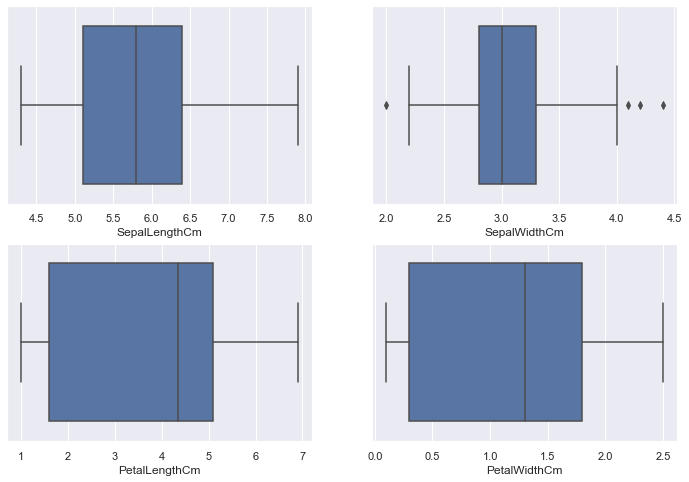

In [39]:

fig,axes = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(iris['SepalLengthCm'],ax=axes[0,0])
sns.boxplot(iris['SepalWidthCm'],ax=axes[0,1])
sns.boxplot(iris['PetalLengthCm'],ax=axes[1,0])
sns.boxplot(iris['PetalWidthCm'],ax=axes[1,1]);

# From the above plot we can see that there are some outliers in the SepalWidthcm attribute

# Outliers Treatment

In [40]:
q1 = iris['SepalWidthCm'].quantile(0.01)
q2 = iris['SepalWidthCm'].quantile(0.99)

iris['SepalWidthCm'][iris['SepalWidthCm']<=q1] = q1
iris['SepalWidthCm'][iris['SepalWidthCm']>=q2] = q2

Standardizing the Data such that mean = 0 and Standard Deviation = 1

In [41]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
iri = scalar.fit_transform(iris.drop('Species',axis=1))

In [42]:
#Converting Standarized data into dataframe
iris_df = pd.DataFrame(iri,columns=iris.columns.drop('Species'))


In [43]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


# Defining correlation between the parameters

In [44]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.113797,0.871754,0.817954
SepalWidthCm,-0.113797,1.000000,-0.423418,-0.359451
PetalLengthCm,0.871754,-0.423418,1.000000,0.962757
PetalWidthCm,0.817954,-0.359451,0.962757,1.000000


# Plotting the correlation data

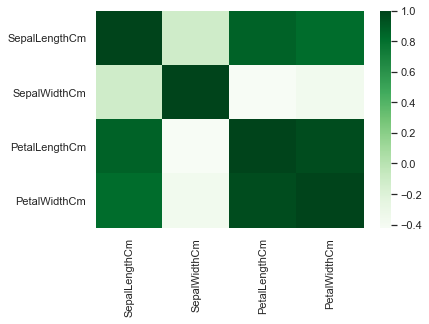

In [45]:
sns.heatmap(iris_df.corr(),cmap='Greens');

# Finding Optimum number of clusters

In [46]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=0)
    kmeans.fit(iris_df)
    sse.append(kmeans.inertia_)

# Elbow Method

Text(0, 0.5, 'SSE')

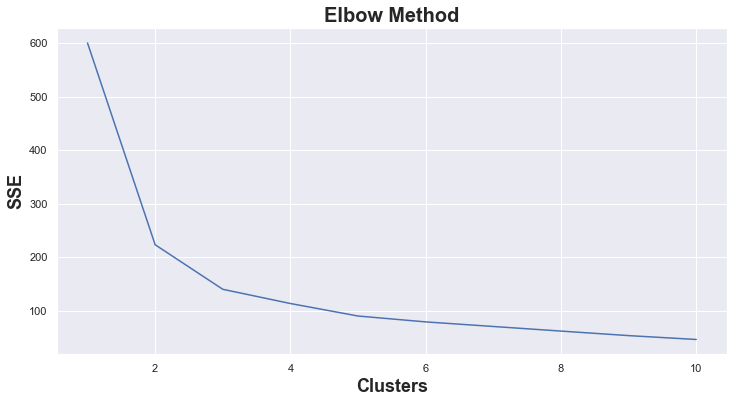

In [47]:

sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
plt.plot(range(1,11),sse)
plt.title('Elbow Method',fontsize=20,fontweight='bold')
plt.xlabel('Clusters',fontsize=18,fontweight='bold')
plt.ylabel('SSE',fontsize=18,fontweight='bold')

# Elbow curve starts Forming around the value, when x = 3
Therefore, Number of Optimum clusters = 3
Applying KMeans to the Dataset

In [48]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_pred = kmeans.fit_predict(iris_df)


# Prediction

In [49]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Flowers under each category

In [50]:
iris_df['clusters'] = y_pred
iris_df['clusters'].value_counts()

2    56
1    50
0    44
Name: clusters, dtype: int64

In [51]:
iris_df['clusters'] = y_pred
iris_df['clusters'].value_counts()

2    56
1    50
0    44
Name: clusters, dtype: int64

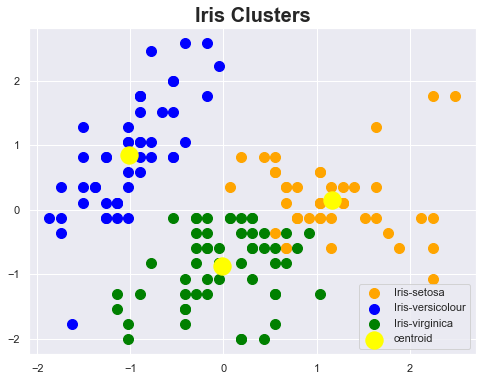

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(iri[y_pred == 0, 0], iri[y_pred == 0, 1],
            s = 100, label = 'Iris-setosa', c = 'orange')
plt.scatter(iri[y_pred == 1,0], iri[y_pred == 1,1],
            s = 100 ,label = 'Iris-versicolour', c = 'blue')
plt.scatter(iri[y_pred == 2,0], iri[y_pred == 2,1],
            s = 100, label = 'Iris-virginica', c = 'green')
#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 300, label = 'centroid', c = 'yellow')
plt.title('Iris Clusters',fontsize = 20, fontweight = 'bold')
plt.legend();

# thank you 

# @GRIPJUNE'21